# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 637


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?'
unit = 'metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}appid={weather_api_key}&q={city}&units={unit}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 2 of Set 1 | canutama
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | broken hill
Processing Record 5 of Set 1 | kapaa
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | high level
Processing Record 8 of Set 1 | dhidhdhoo
Processing Record 9 of Set 1 | xinqing
Processing Record 10 of Set 1 | ingham
Processing Record 11 of Set 1 | provideniya
Processing Record 12 of Set 1 | baruun-urt
Processing Record 13 of Set 1 | coruripe
Processing Record 14 of Set 1 | arraial do cabo
Processing Record 15 of Set 1 | new norfolk
Processing Record 16 of Set 1 | victoria
Processing Record 17 of Set 1 | mayo
Processing Record 18 of Set 1 | hobart
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | torbay
Processing Record 22 of Set 1 | mount isa
Pr

Processing Record 40 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 41 of Set 4 | dibaya
City not found. Skipping...
Processing Record 42 of Set 4 | antofagasta
Processing Record 43 of Set 4 | husavik
Processing Record 44 of Set 4 | harjavalta
Processing Record 45 of Set 4 | doha
Processing Record 46 of Set 4 | taltal
Processing Record 47 of Set 4 | chuy
Processing Record 48 of Set 4 | fare
Processing Record 49 of Set 4 | mandan
Processing Record 0 of Set 5 | gympie
Processing Record 1 of Set 5 | straumen
Processing Record 2 of Set 5 | ponta do sol
Processing Record 3 of Set 5 | mahebourg
Processing Record 4 of Set 5 | illoqqortoormiut
City not found. Skipping...
Processing Record 5 of Set 5 | constitucion
Processing Record 6 of Set 5 | acapulco
Processing Record 7 of Set 5 | los llanos de aridane
Processing Record 8 of Set 5 | yellowknife
Processing Record 9 of Set 5 | palabuhanratu
City not found. Skipping...
Processing Record 10 of Set 5 | satitoa
City not found. S

Processing Record 25 of Set 8 | walvis bay
Processing Record 26 of Set 8 | daxian
City not found. Skipping...
Processing Record 27 of Set 8 | inveraray
City not found. Skipping...
Processing Record 28 of Set 8 | barpali
Processing Record 29 of Set 8 | nanchang
Processing Record 30 of Set 8 | lashma
Processing Record 31 of Set 8 | iqaluit
Processing Record 32 of Set 8 | mikuni
Processing Record 33 of Set 8 | taoudenni
Processing Record 34 of Set 8 | miri
Processing Record 35 of Set 8 | stroud
Processing Record 36 of Set 8 | huallanca
Processing Record 37 of Set 8 | buqayq
City not found. Skipping...
Processing Record 38 of Set 8 | kailua
Processing Record 39 of Set 8 | aksarka
Processing Record 40 of Set 8 | tura
Processing Record 41 of Set 8 | yarada
Processing Record 42 of Set 8 | bethel
Processing Record 43 of Set 8 | curanilahue
Processing Record 44 of Set 8 | ondorhaan
City not found. Skipping...
Processing Record 45 of Set 8 | geraldton
Processing Record 46 of Set 8 | louisbourg
C

Processing Record 8 of Set 12 | ahipara
Processing Record 9 of Set 12 | sitangkai
Processing Record 10 of Set 12 | champua
Processing Record 11 of Set 12 | alotau
City not found. Skipping...
Processing Record 12 of Set 12 | atambua
Processing Record 13 of Set 12 | ortakoy
Processing Record 14 of Set 12 | wadi maliz
Processing Record 15 of Set 12 | dali
Processing Record 16 of Set 12 | yabassi
Processing Record 17 of Set 12 | nara
Processing Record 18 of Set 12 | kaseda
Processing Record 19 of Set 12 | chase
Processing Record 20 of Set 12 | cidreira
Processing Record 21 of Set 12 | hede
Processing Record 22 of Set 12 | xiaoshi
Processing Record 23 of Set 12 | ngunguru
Processing Record 24 of Set 12 | lopukhiv
Processing Record 25 of Set 12 | balikpapan
Processing Record 26 of Set 12 | baisha
Processing Record 27 of Set 12 | jodhpur
Processing Record 28 of Set 12 | wyndham
Processing Record 29 of Set 12 | sao jose de piranhas
Processing Record 30 of Set 12 | chimore
Processing Record 31 

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,canutama,-6.5339,-64.3831,23.11,97,90,1.08,BR,1676080010
1,avarua,-21.2078,-159.7750,28.03,78,20,4.63,CK,1676080011
2,broken hill,-31.9500,141.4333,31.14,20,0,4.48,AU,1676080011
3,kapaa,22.0752,-159.3190,27.99,70,40,8.75,US,1676080012
4,puerto ayora,-0.7393,-90.3518,26.42,94,98,1.34,EC,1676080012


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("/Users/aldosilva/Downloads/Starter_Code/output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("/Users/aldosilva/Downloads/Starter_Code/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,canutama,-6.5339,-64.3831,23.11,97,90,1.08,BR,1676080010
1,avarua,-21.2078,-159.7750,28.03,78,20,4.63,CK,1676080011
2,broken hill,-31.9500,141.4333,31.14,20,0,4.48,AU,1676080011
3,kapaa,22.0752,-159.3190,27.99,70,40,8.75,US,1676080012
4,puerto ayora,-0.7393,-90.3518,26.42,94,98,1.34,EC,1676080012


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

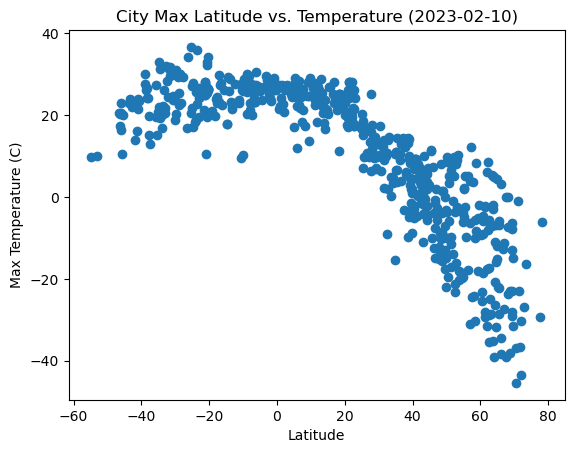

In [13]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2023-02-10)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("/Users/aldosilva/Downloads/Starter_Code/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

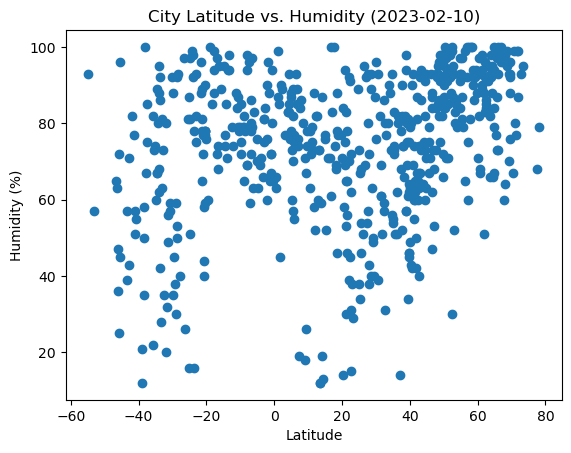

In [14]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-02-10)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("/Users/aldosilva/Downloads/Starter_Code/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

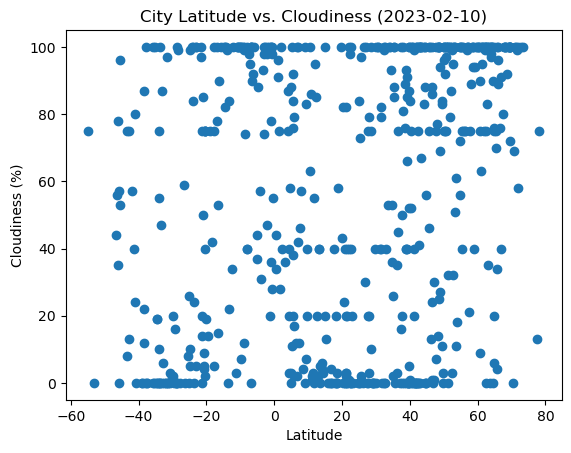

In [15]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-02-10)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("/Users/aldosilva/Downloads/Starter_Code/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

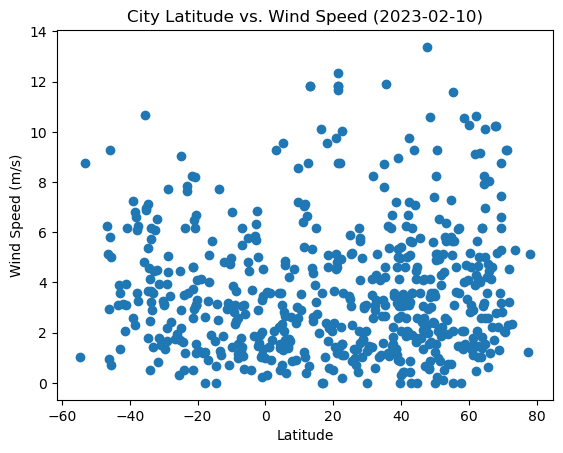

In [16]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-02-10)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("/Users/aldosilva/Downloads/Starter_Code/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,kapaa,22.0752,-159.3190,27.99,70,40,8.75,US,1676080012
5,high level,58.5169,-117.1360,-9.94,92,100,2.06,CA,1676080013
6,dhidhdhoo,6.8833,73.1000,26.42,74,42,1.76,MV,1676080014
7,xinqing,48.2333,129.5000,-8.77,85,100,0.54,CN,1676080014
8,ingham,42.6000,-84.3833,-1.43,67,100,5.66,US,1676080015


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,canutama,-6.5339,-64.3831,23.11,97,90,1.08,BR,1676080010
1,avarua,-21.2078,-159.7750,28.03,78,20,4.63,CK,1676080011
2,broken hill,-31.9500,141.4333,31.14,20,0,4.48,AU,1676080011
4,puerto ayora,-0.7393,-90.3518,26.42,94,98,1.34,EC,1676080012
11,coruripe,-10.1256,-36.1756,25.86,79,100,4.98,BR,1676080017


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8564605701295489.
The p-value is 8.625748131083456e-118.


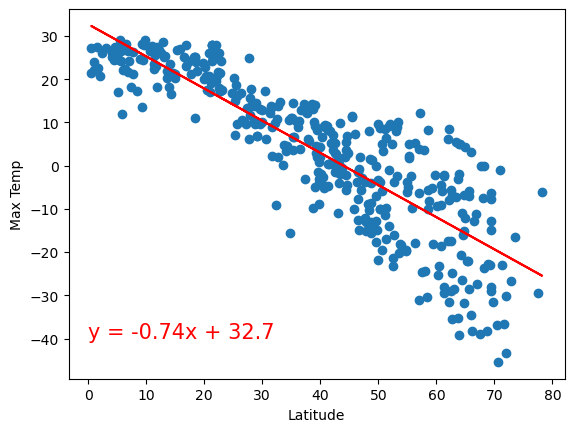

In [54]:
# Linear regression on Northern Hemisphere
from scipy.stats import linregress

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
regress_values = northern_hemi_df["Lat"]* slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")
plt.annotate(line_eq, (0, -40), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f'The r-value is {rvalue}.')
print(f'The p-value is {pvalue}.')
plt.show()

The r-value is 0.329470207988364.
The p-value is 8.003916138832796e-06.


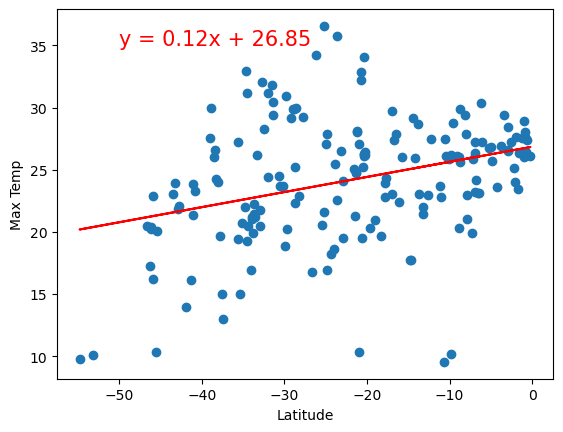

In [55]:
# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
regress_values = southern_hemi_df["Lat"]* slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")
plt.annotate(line_eq, (-50, 35), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f'The r-value is {rvalue}.')
print(f'The p-value is {pvalue}.')
plt.show()

**Discussion about the linear relationship:** While Max Temp and Latitude are correlated in both the Northern and Southern Hemisphere, the linear relationship is much stronger in the Northern Hemisphere (rvalue=-0.85) than in the Southern HEmisphere (rvalue=0.32).

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.3764086888877615.
The p-value is 4.436609140046065e-15.


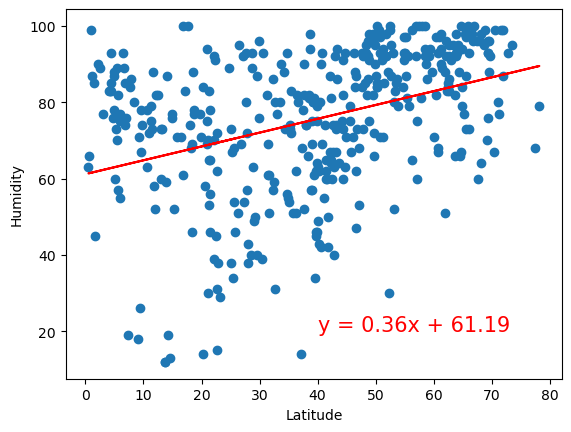

In [56]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
regress_values = northern_hemi_df["Lat"]* slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")
plt.annotate(line_eq, (40, 20), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'The r-value is {rvalue}.')
print(f'The p-value is {pvalue}.')
plt.show()

The r-value is 0.3528868098531038.
The p-value is 1.5578866752808977e-06.


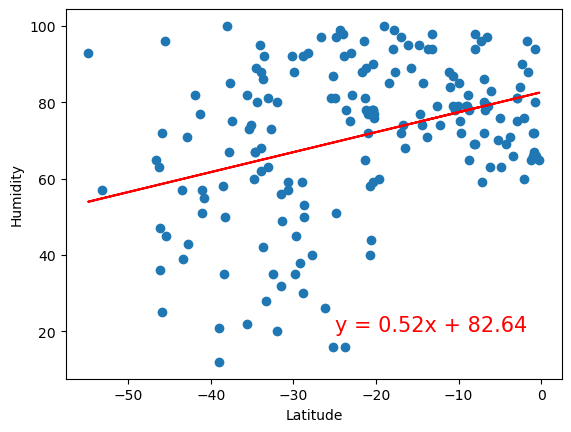

In [57]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
regress_values = southern_hemi_df["Lat"]* slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")
plt.annotate(line_eq, (-25, 20), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'The r-value is {rvalue}.')
print(f'The p-value is {pvalue}.')
plt.show()

**Discussion about the linear relationship:** The relationship between Latitude and Humidity for both, the Northern and Southern Hemisphere has approximately the same strength.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.39449431265779444.
The p-value is 1.5636467519750576e-16.


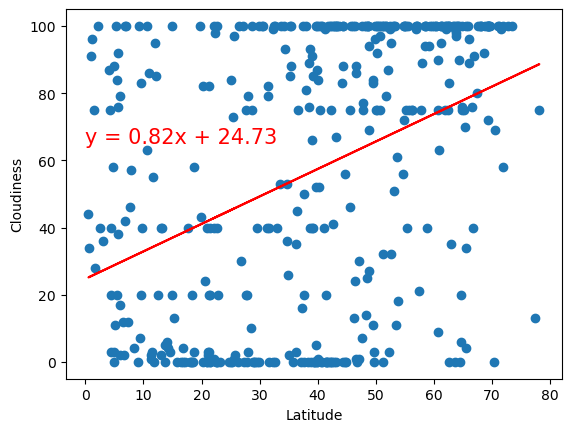

In [58]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
regress_values = northern_hemi_df["Lat"]* slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")
plt.annotate(line_eq, (0, 65), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r-value is {rvalue}.')
print(f'The p-value is {pvalue}.')
plt.show()

The r-value is 0.4239969847936322.
The p-value is 4.521747389472697e-09.


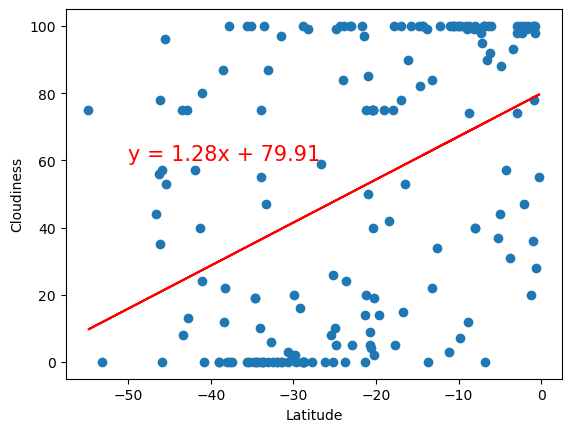

In [59]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
regress_values = southern_hemi_df["Lat"]* slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")
plt.annotate(line_eq, (-50, 60), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r-value is {rvalue}.')
print(f'The p-value is {pvalue}.')
plt.show()

**Discussion about the linear relationship:** The relationship between Latitude and Humidity for both, the Northern and Southern Hemisphere has approximately the same strength. A relationship is likely to exist because pvalue<0.05.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.08430886802136843.
The p-value is 0.090178467672442.


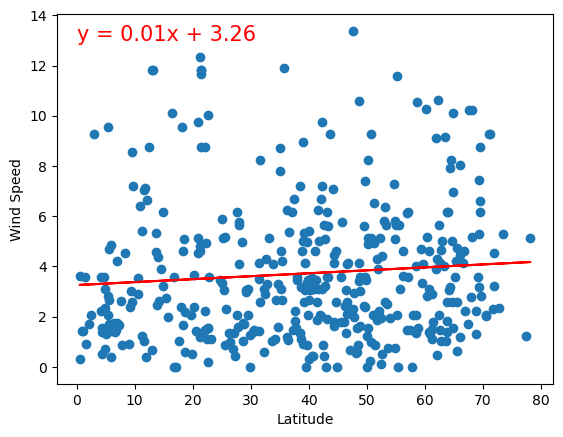

In [60]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
regress_values = northern_hemi_df["Lat"]* slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")
plt.annotate(line_eq, (0, 13), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'The r-value is {rvalue}.')
print(f'The p-value is {pvalue}.')
plt.show()

The r-value is -0.2386451948395152.
The p-value is 0.001424497191664709.


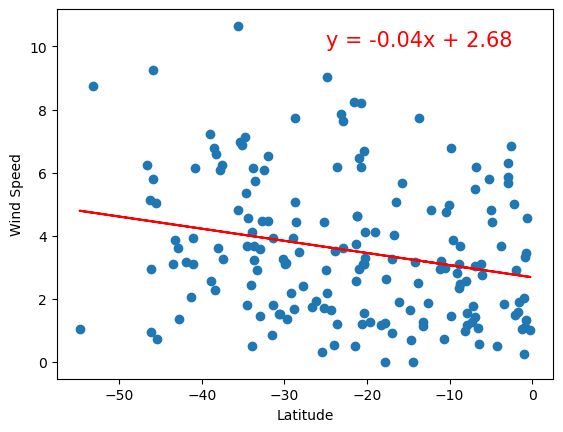

In [63]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
regress_values = southern_hemi_df["Lat"]* slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")
plt.annotate(line_eq, (-25, 10), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'The r-value is {rvalue}.')
print(f'The p-value is {pvalue}.')
plt.show()

**Discussion about the linear relationship:** While for the Southern Hemisphere, likely there is a relationship (pvalue<0.05), it is not the strong. For the Northern Hemisphere, we can confirm there isn't a relationship (pvalue>0.05).